<h1><center>MA591 Project</center></h1>
<h2><center>Ran Zhang</center></h2>

## Instruction

**Clustering** is an important **Machine Learning** Technology work on data without labels. Unlike the data with labels, which we can estimate the values (regression) or classification. For data without labels, we can use clustering to group the different data points, we assume the data points in the same group have similar or same features, data points in the different groups have different features. Here, we'll use four different algorithms on clustering (K-means nearest, Hierarchial,Density Based Clustering, Gaussian Maximum Model Clustering), optimize the parameters and then compare three different algorithms on different datasets to find the best performance algorithm on each dataset. Iris dataset and is used to here. Although the IRIS dataset has labels (target), we will hide them then apply our algorithms to do the clustering. Accuracy and confusion matrix are two candidates to used for compareing performances among three algorithms. 

## Methology

### 1. K-Means Nearest Clustering

**K-Means Nearest Clustering** is the most common and easy cluster method we used in the world. Here, K represents the number of clusters (groups) we want to seperate. First, we randomly place k points, which we called centroids. Then, calculate the distance between the centroids and the data points. Therefore, each data points here have K different distance to k centroids. After that, data points assigned to the K different groups which has the mimum distance to the centroids. After different grousp assigned, we calculate the centers of K different gourps and then move the centroids to K different centers. Then, we repeate the past two steps until centroids cannot be moved. 


### 2. Hierarchial Clustering

**Hierarchial clustering** is used to group similar objects. Here, each object is viewed as a seperate cluster. Then two closest clusters/datapoints are merged together based on distance. This step will be repeated again and again until all datapoints merged together. Distance in the hierarchial clustering is called Euclidean distance, which measured based on linkage. There are different linkage methods available, which are single-link clustering, complete-link clustering, average-link clustering and Ward's method clustering. **Single-link** is to measure the cloest distance between two clusters, it will not be applied in our example here as it is the not in sklearn in python. **Complete-link** is to measure the farest distance between two clusters; **Average-link** is to calculate the average distance between two clusters; **Ward's method**, we first identify the center points between two clusters and calculate the square distance between the center to each data points, set as D. Then for each cluster, we calculate the distance between the data points to the center within the cluster, set as d. Then we used the sum of square distance between the data points and centers (between the clusters, D) minus the sum of distance between the data points and centers (within the cluster, d).  

### 3. Gaussian Mixture Model Clustering

**Gaussian Mixture Model Clustering** is a clustering algorithm which assumes each cluster has their own statistical distribution. Unlike other clustering methods, GMM uses the soft clustering approach to cluster the data points. First, it initializes a Gaussian Distribution with initial parameter (µ, σ²). Then, it soft-clustering the data points on a soft step based on membership, which is the PDF of normal distribution. Then, re-estimate the parameters by using **Expectation-Maximization** algorithm. 

### 4. Density – Based Clustering (DBSCAN)

**Density-Based Clustering** is different from the algortihms above, not all points will be in the clusters. Two important parameters in DBSCAN defines how to formulate a cluster. *Minumum numbers of points (m)* and *maximum distance between two samples (d)*. For any point we started, it needs to find m points within d distance. If there are m points within d distance, this point will be identified as **core point**; if not this point will be indenfied as **noise points** unless find another core point within d distance. If one noise point is in the cluster of one core point, this point is identified as **border point**.

## Implementation

### Get the Data

Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.random.seed(666)

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

### Explore Data Analysis

In [6]:
sns.set_style('whitegrid')

**Pair plot of Iris**

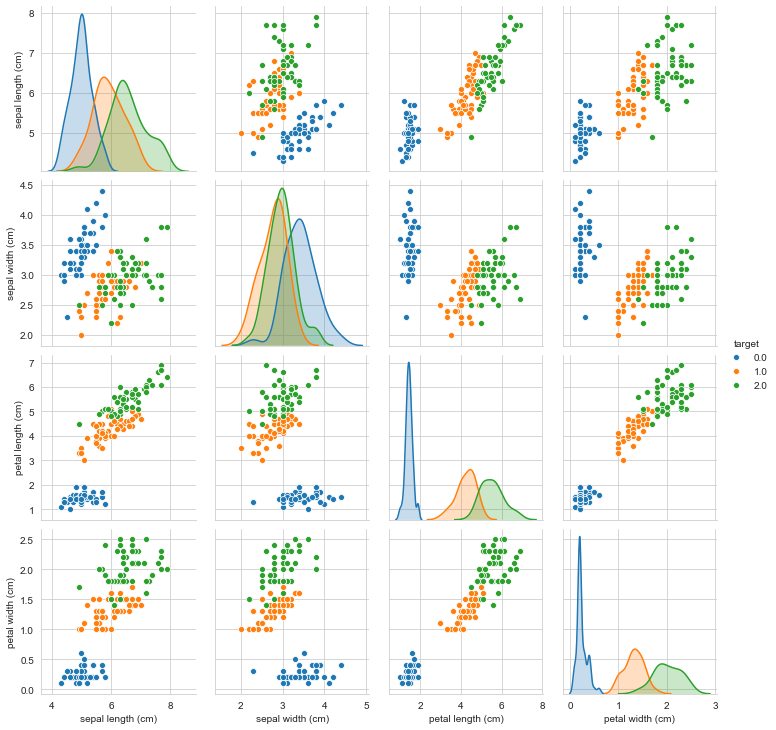

In [7]:
sns.pairplot(df,hue='target')

**Create a stacked histogram showing four variables**

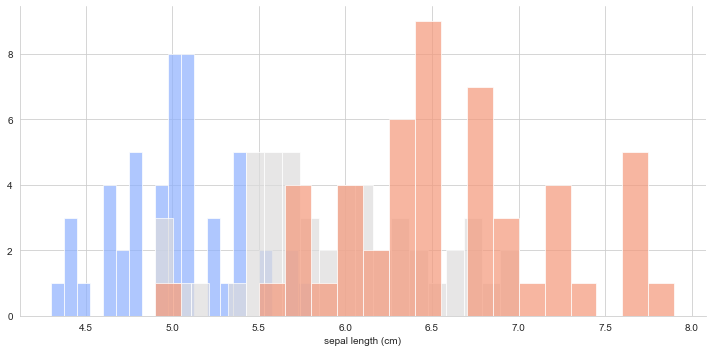

In [8]:
g = sns.FacetGrid(df,hue="target",palette='coolwarm',height=5,aspect=2)
g = g.map(plt.hist,'sepal length (cm)',bins=20,alpha=0.7)

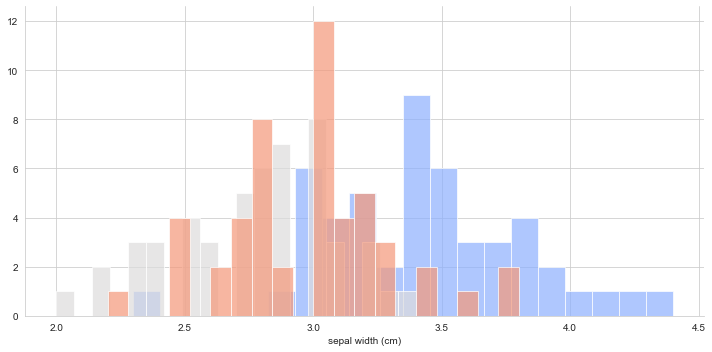

In [9]:
g = sns.FacetGrid(df,hue="target",palette='coolwarm',height=5,aspect=2)
g = g.map(plt.hist,'sepal width (cm)',bins=20,alpha=0.7)

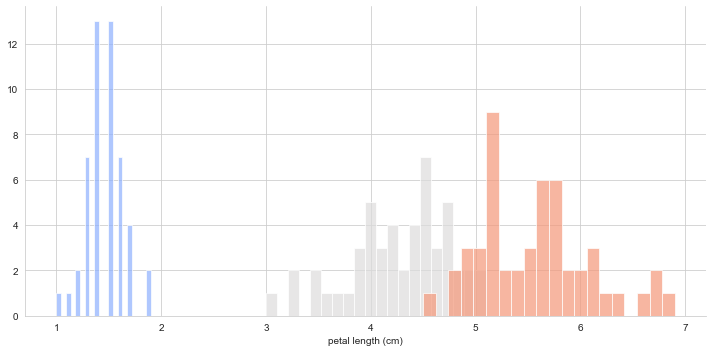

In [10]:
g = sns.FacetGrid(df,hue="target",palette='coolwarm',height=5,aspect=2)
g = g.map(plt.hist,'petal length (cm)',bins=20,alpha=0.7)

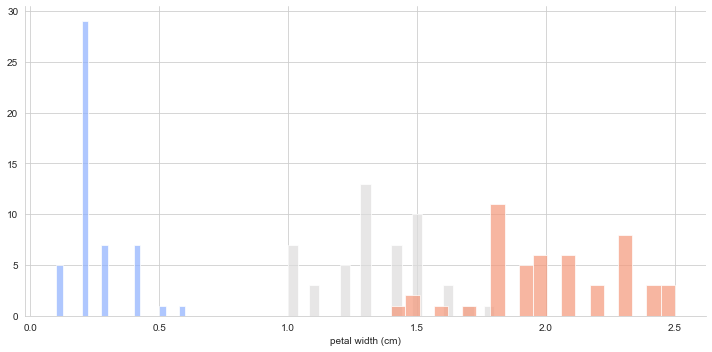

In [11]:
g = sns.FacetGrid(df,hue="target",palette='coolwarm',height=5,aspect=2)
g = g.map(plt.hist,'petal width (cm)',bins=20,alpha=0.7)

### Dimension Reduction by Principal Component Analysis

**Feature Scaling**

In [12]:
X = df.drop('target',axis=1)
y = df['target']

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing as p
X_ss = p.StandardScaler().fit_transform(X)
X_ss = pd.DataFrame(X_ss)
X_ss.columns = df.columns[:-1]

**Principal Component Analysis**

In [14]:
from sklearn.decomposition import PCA
def do_pca(n_components, data, random_st=42):
    '''
    Transforms data using PCA to create n_components, and provides back the results of the
    transformation.
    INPUT: n_components - int - the number of principal components to create
           data - the data you would like to transform
    OUTPUT: pca - the pca object created after fitting the data
            X_pca - the transformed X matrix with new number of components
    '''
    X = StandardScaler().fit_transform(data)
    pca = PCA(n_components, random_state=random_st)
    X_pca = pca.fit_transform(X)
    return pca, X_pca

In [15]:
def pca_results(full_dataset, pca, save=1, start=0, finish=1337):
    """
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    :param save: boolean flag, 1, if image shall be saved
    :param full_dataset: dataframe, that is used to display data
    :param pca: The pca data
    :param start: THe begining parameter of which pca components should be displayed
    :param finish: The end number, of which pca components should be displayed
    :return:
    """
    if finish == 1337:
        finish = len(pca.components_)

    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)][start:finish]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = full_dataset.keys())[start:finish]
    # 	components = components
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])[start:finish]
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_[start:finish]):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    if save:
        fig.savefig('PcaResult.png')

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis=1)


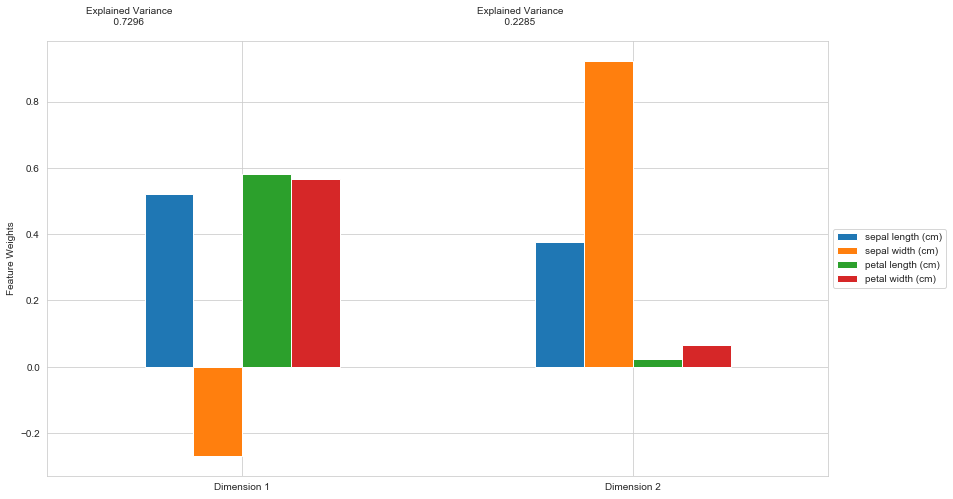

In [16]:
for comp in range(2, 4):
    pca, X_pca = do_pca(comp, X_ss)
    comp_check = pca_results(X_ss, pca)
    if comp_check['Explained Variance'].sum() > 0.90:
        break
        

num_comps = comp_check.shape[0]

In [17]:
pca, X_pca = do_pca(2, X_ss)

In [18]:
df_pca = X_pca.copy() 
df_pca = pd.DataFrame(df_pca)
df_pca.columns = ['PC1','PC2']
df_pca.head()

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


**As there are only two dimensions here and only 4 variables here, although first two PCs explain more than 90% variance, consider the plots before, I think it is better to discuss it by sepal and petal, within width and length but not apply the dimension reduction here.** 

### 1. K-Means Nearest Clustering

In [19]:
from sklearn.cluster import KMeans

**Create a plot to find the best k value**

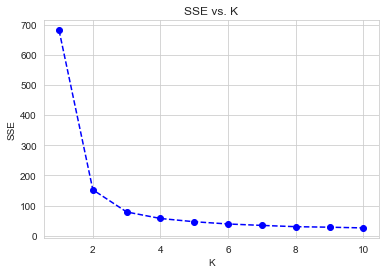

In [20]:
def get_kmeans_score(X, center):

    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)

    # Then fit the model to your data using the fit method
    model = kmeans.fit(X)
    
    # Obtain a score related to the model fit
    score = np.abs(model.score(X))
    
    return score

scores = []
centers = list(range(1,11))

for center in centers:
    scores.append(get_kmeans_score(X, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K');

**As it falls fast from K =1 to K =3 but slowly since from K=3 , so we choose to fit the model with 3 clusters without label data.**

In [21]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmn_pred = kmeans.fit_predict(X)

### 2. Hierarchical Clustering

In [22]:
from sklearn.cluster import AgglomerativeClustering

**Ward's method**

In [23]:
ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(X)

**Complete-link**

In [24]:
complete = AgglomerativeClustering(n_clusters=3,linkage='complete')
complete_pred = complete.fit_predict(X)

**Average-link**

In [25]:
avg = AgglomerativeClustering(n_clusters=3,linkage='average')
avg_pred = avg.fit_predict(X)

### 3. Gaussian Mixture Model Clustering

In [26]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(X)
pred_gmm = gmm.predict(X)

### 4. Denstiy – Based Clustering

In [27]:
from sklearn.cluster import DBSCAN
DBS = DBSCAN(eps=3, min_samples=2)
DBS_pred = DBS.fit(X)

## Results and Testing

### 1.Visualization

**K-Means Nearest Clustering**

As it is easy to see the results by visualization for KMN applied. Becasue it may assigned the wrong groups order but with similar assign type.

In [28]:
df1 = X.copy()
df1['target']= kmn_pred
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


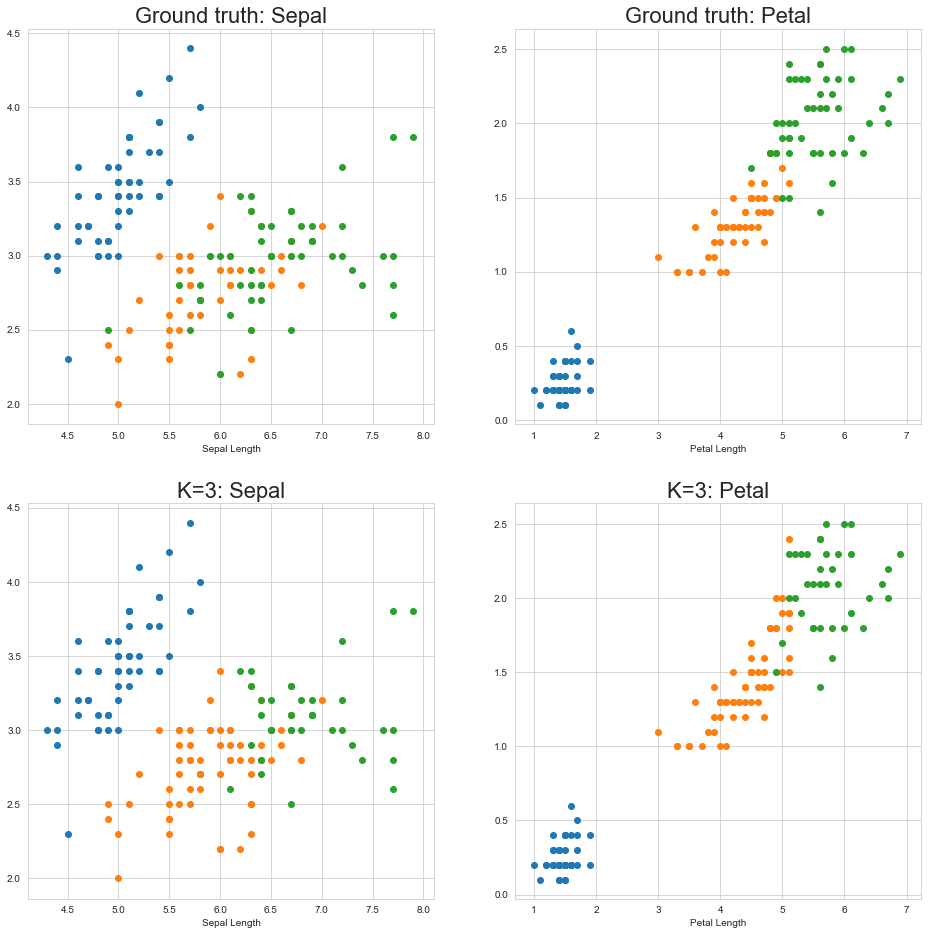

In [29]:
plt.figure(figsize=(16,16))

plt.subplot(2,2,1)
plt.title('Ground truth: Sepal',fontsize=22)
plt.xlabel('Sepal Width')
plt.xlabel('Sepal Length')
plt.scatter(df['sepal length (cm)'][df.target == 0],
            df['sepal width (cm)'][df.target == 0])
plt.scatter(df['sepal length (cm)'][df.target == 1],
            df['sepal width (cm)'][df.target == 1])
plt.scatter(df['sepal length (cm)'][df.target == 2],
            df['sepal width (cm)'][df.target == 2])

plt.subplot(2,2,2)
plt.title('Ground truth: Petal',fontsize=22)
plt.xlabel('Petal Width')
plt.xlabel('Petal Length')
plt.scatter(df['petal length (cm)'][df.target == 0],
            df['petal width (cm)'][df.target == 0])
plt.scatter(df['petal length (cm)'][df.target == 1],
            df['petal width (cm)'][df.target == 1])
plt.scatter(df['petal length (cm)'][df.target == 2],
            df['petal width (cm)'][df.target == 2])

plt.subplot(2,2,3)
plt.title('K=3: Sepal',fontsize=22)
plt.xlabel('Sepal Width')
plt.xlabel('Sepal Length')
plt.scatter(df1['sepal length (cm)'][df1.target == 0],
            df1['sepal width (cm)'][df1.target == 0])
plt.scatter(df1['sepal length (cm)'][df1.target == 1],
            df1['sepal width (cm)'][df1.target == 1])
plt.scatter(df1['sepal length (cm)'][df1.target == 2],
            df1['sepal width (cm)'][df1.target == 2])

plt.subplot(2,2,4)
plt.title('K=3: Petal',fontsize=22)
plt.xlabel('Petal Width')
plt.xlabel('Petal Length')
plt.scatter(df1['petal length (cm)'][df1.target == 0],
            df1['petal width (cm)'][df1.target == 0])
plt.scatter(df1['petal length (cm)'][df1.target == 1],
            df1['petal width (cm)'][df1.target == 1])
plt.scatter(df1['petal length (cm)'][df1.target == 2],
            df1['petal width (cm)'][df1.target == 2])

**2. Hierachial Clustering**

**Dendrogram visualization with average link**

<Figure size 1584x720 with 0 Axes>

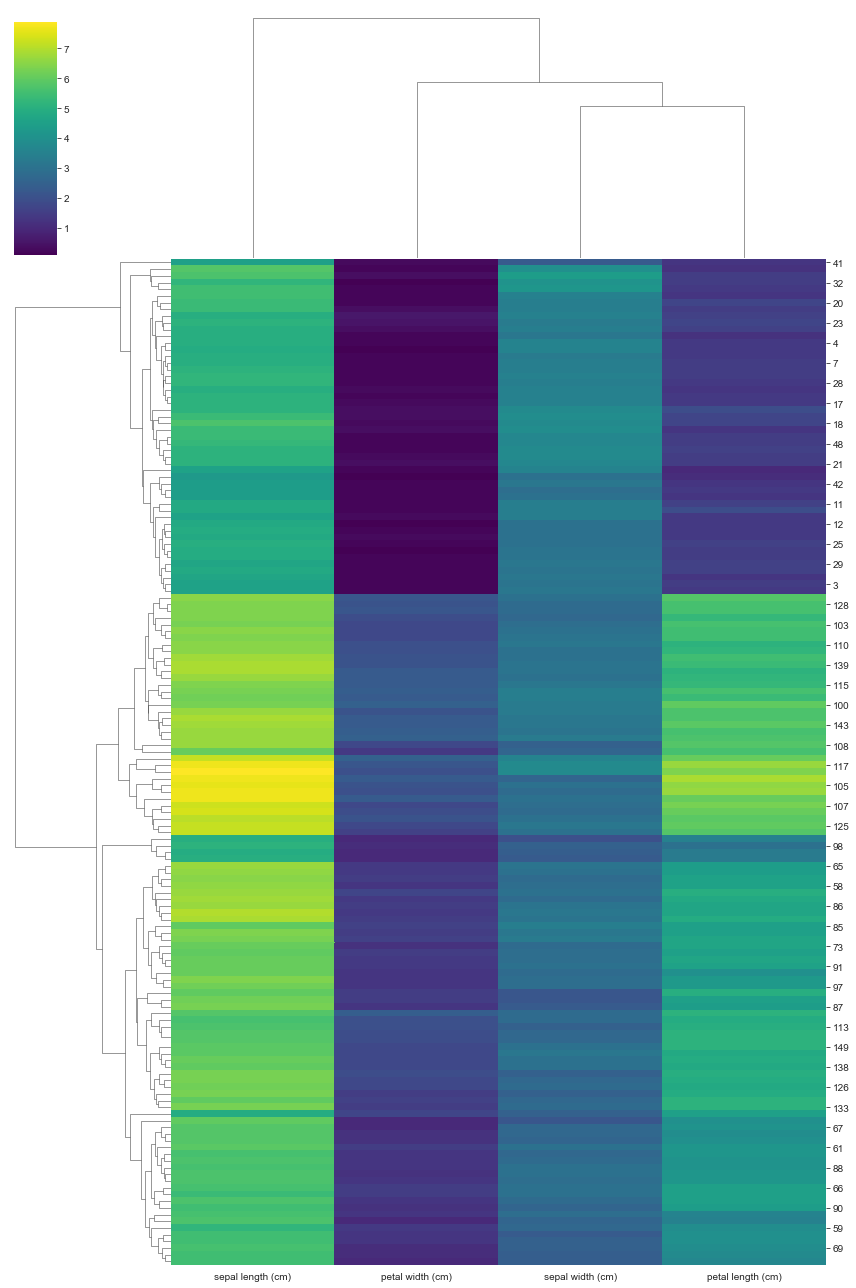

In [30]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
linkage_type = 'average'
linkage_matrix = linkage(X, linkage_type)
plt.figure(figsize=(22,10))
sns.clustermap(X, figsize=(12,18), method=linkage_type, cmap='viridis')

**Dendrogram visualization with complete link**

<Figure size 1584x720 with 0 Axes>

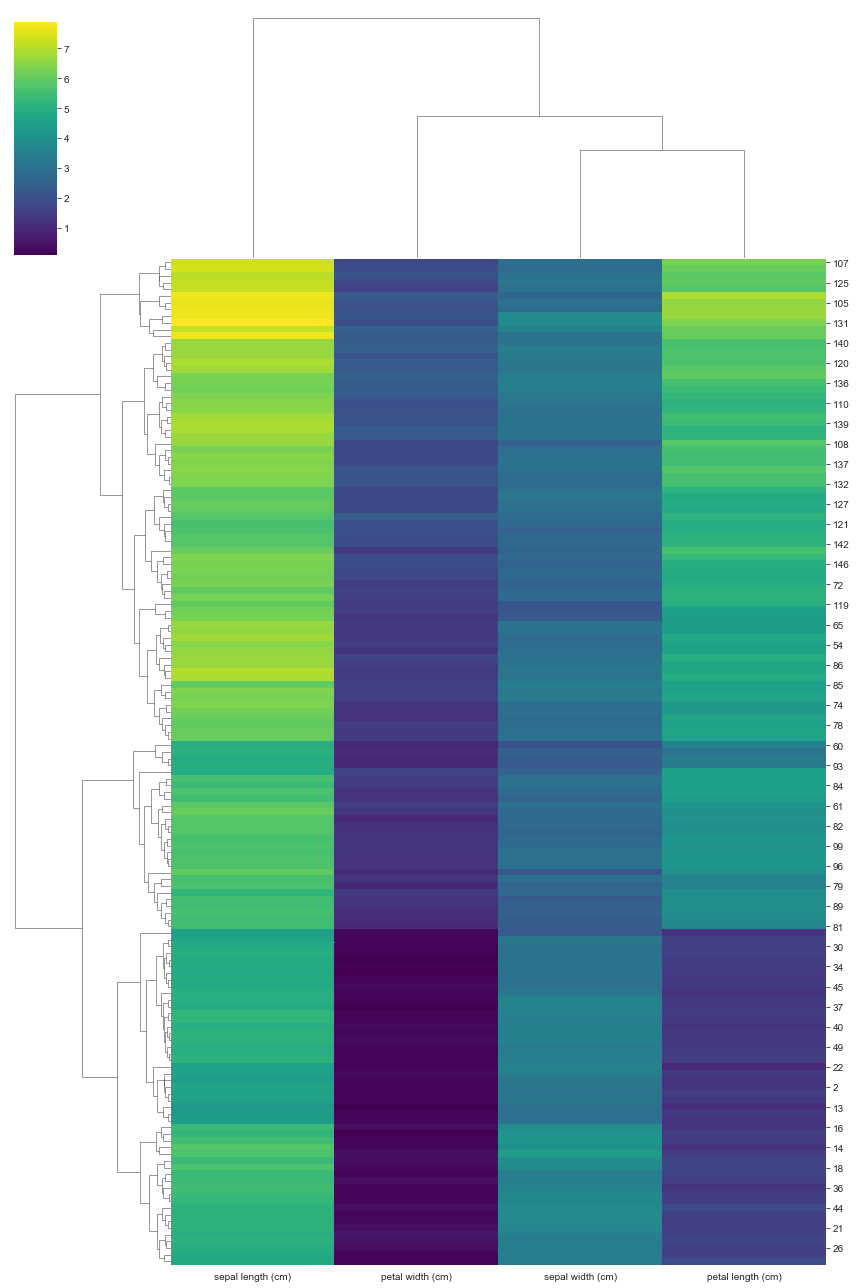

In [31]:
linkage_type = 'complete'
linkage_matrix = linkage(X, linkage_type)
plt.figure(figsize=(22,10))
sns.clustermap(X, figsize=(12,18), method=linkage_type, cmap='viridis')

**Dendrogram visualization with ward link**

<Figure size 1584x720 with 0 Axes>

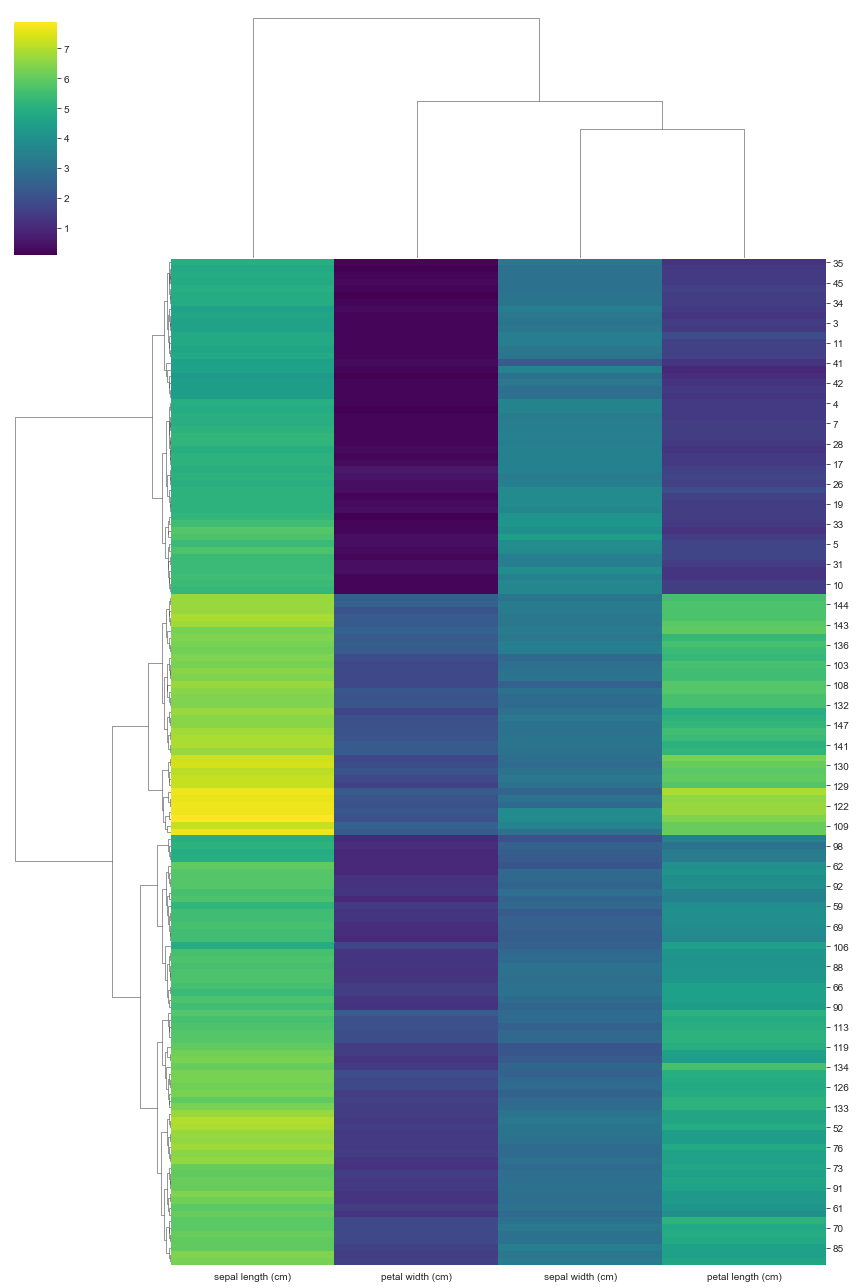

In [32]:
linkage_type = 'ward'
linkage_matrix = linkage(X, linkage_type)
plt.figure(figsize=(22,10))
sns.clustermap(X, figsize=(12,18), method=linkage_type, cmap='viridis')

**I don't get enough information here from dendrogram to indetify which link method is the best on our data**

**3.Gaussian Mixture Model Clustering**

In [33]:
df2 = X.copy()
df2['target']= pred_gmm

Compare the gmm model of Speal and Petal individually and compare to the original data

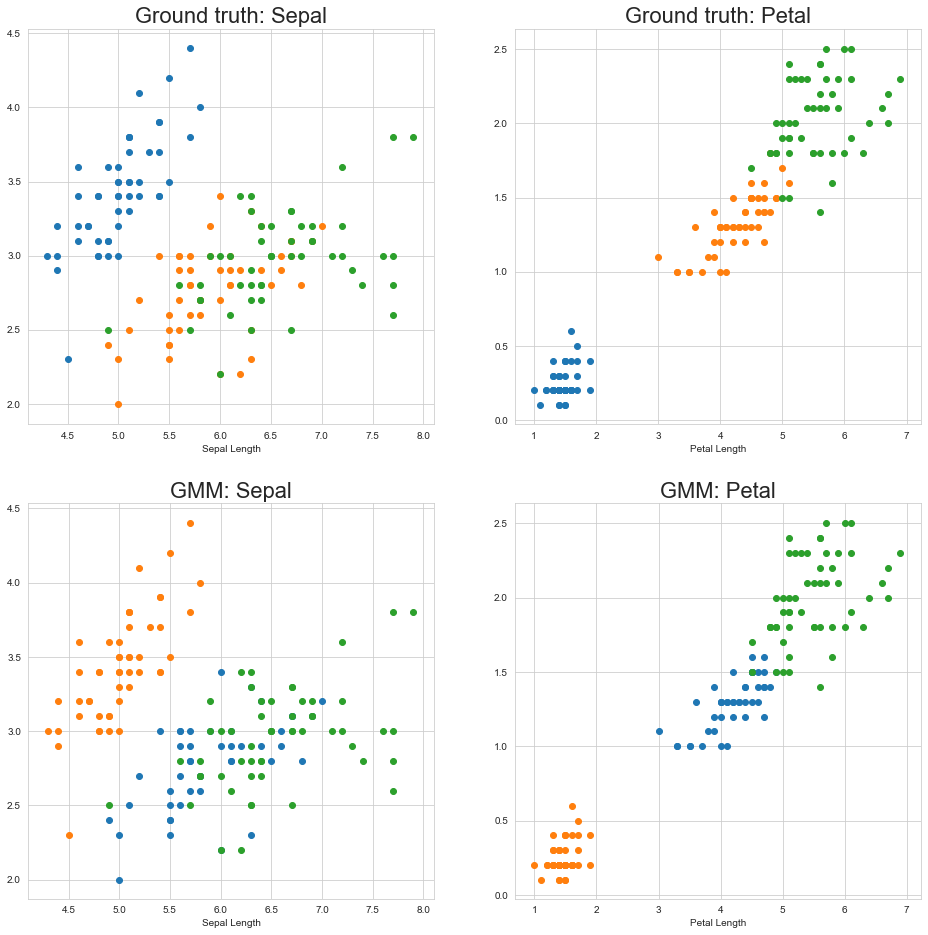

In [34]:
plt.figure(figsize=(16,16))

plt.subplot(2,2,1)
plt.title('Ground truth: Sepal',fontsize=22)
plt.xlabel('Sepal Width')
plt.xlabel('Sepal Length')
plt.scatter(df['sepal length (cm)'][df.target == 0],
            df['sepal width (cm)'][df.target == 0])
plt.scatter(df['sepal length (cm)'][df.target == 1],
            df['sepal width (cm)'][df.target == 1])
plt.scatter(df['sepal length (cm)'][df.target == 2],
            df['sepal width (cm)'][df.target == 2])

plt.subplot(2,2,2)
plt.title('Ground truth: Petal',fontsize=22)
plt.xlabel('Petal Width')
plt.xlabel('Petal Length')
plt.scatter(df['petal length (cm)'][df.target == 0],
            df['petal width (cm)'][df.target == 0])
plt.scatter(df['petal length (cm)'][df.target == 1],
            df['petal width (cm)'][df.target == 1])
plt.scatter(df['petal length (cm)'][df.target == 2],
            df['petal width (cm)'][df.target == 2])

plt.subplot(2,2,3)
plt.title('GMM: Sepal',fontsize=22)
plt.xlabel('Sepal Width')
plt.xlabel('Sepal Length')
plt.scatter(df2['sepal length (cm)'][df2.target == 0],
            df2['sepal width (cm)'][df2.target == 0])
plt.scatter(df2['sepal length (cm)'][df2.target == 1],
            df2['sepal width (cm)'][df2.target == 1])
plt.scatter(df2['sepal length (cm)'][df2.target == 2],
            df2['sepal width (cm)'][df2.target == 2])

plt.subplot(2,2,4)
plt.title('GMM: Petal',fontsize=22)
plt.xlabel('Petal Width')
plt.xlabel('Petal Length')
plt.scatter(df2['petal length (cm)'][df2.target == 0],
            df2['petal width (cm)'][df2.target == 0])
plt.scatter(df2['petal length (cm)'][df2.target == 1],
            df2['petal width (cm)'][df2.target == 1])
plt.scatter(df2['petal length (cm)'][df2.target == 2],
            df2['petal width (cm)'][df2.target == 2])

**Overall, from the visualization above, GMM defines really good job with default parameters with 3 clusters, test more on parameters later**

**4. Density-Based Clustering**

In [35]:
X_sepal = X.iloc[:,:2]
X_petal = X.iloc[:,2:]

Define a DBSCAN plot function

In [36]:
from itertools import cycle, islice
from sklearn import cluster

figsize = (10,10)
point_size=150
point_border=0.8

    
def plot_dbscan_grid(dataset, eps_values, min_samples_values):
    
    fig = plt.figure(figsize=(16, 20))
    plt.subplots_adjust(left=.02, right=.98, bottom=0.001, top=.96, wspace=.05,
                        hspace=0.25)


    plot_num = 1

    for i, min_samples in enumerate(min_samples_values):
        for j, eps in enumerate(eps_values):
            ax = fig.add_subplot( len(min_samples_values) , len(eps_values), plot_num)

            dbscan = cluster.DBSCAN(eps=eps, min_samples=min_samples)
            y_pred_2 = dbscan.fit_predict(dataset)

            colors = np.array(list(islice(cycle(['#df8efd', '#78c465', '#ff8e34',
                                                 '#f65e97', '#a65628', '#984ea3',
                                                 '#999999', '#e41a1c', '#dede00']),
                                          int(max(y_pred_2) + 1))))
            colors = np.append(colors, '#BECBD6')


            for point in dataset:
                circle1 = plt.Circle(point, eps, color='#666666', fill=False, zorder=0, alpha=0.3)
                ax.add_artist(circle1)

            ax.text(0, -0.03, 'Epsilon: {} \nMin_samples: {}'.format(eps, min_samples), transform=ax.transAxes, fontsize=16, va='top')
            ax.scatter(dataset[:, 0], dataset[:, 1], s=50, color=colors[y_pred_2], zorder=10, edgecolor='black', lw=0.5)


            plt.xticks(())
            plt.yticks(())
            plt.xlim(0, 10)
            plt.ylim(0, 5)

            plot_num = plot_num + 1

    plt.show()

Test for sepal width vs. sepal length

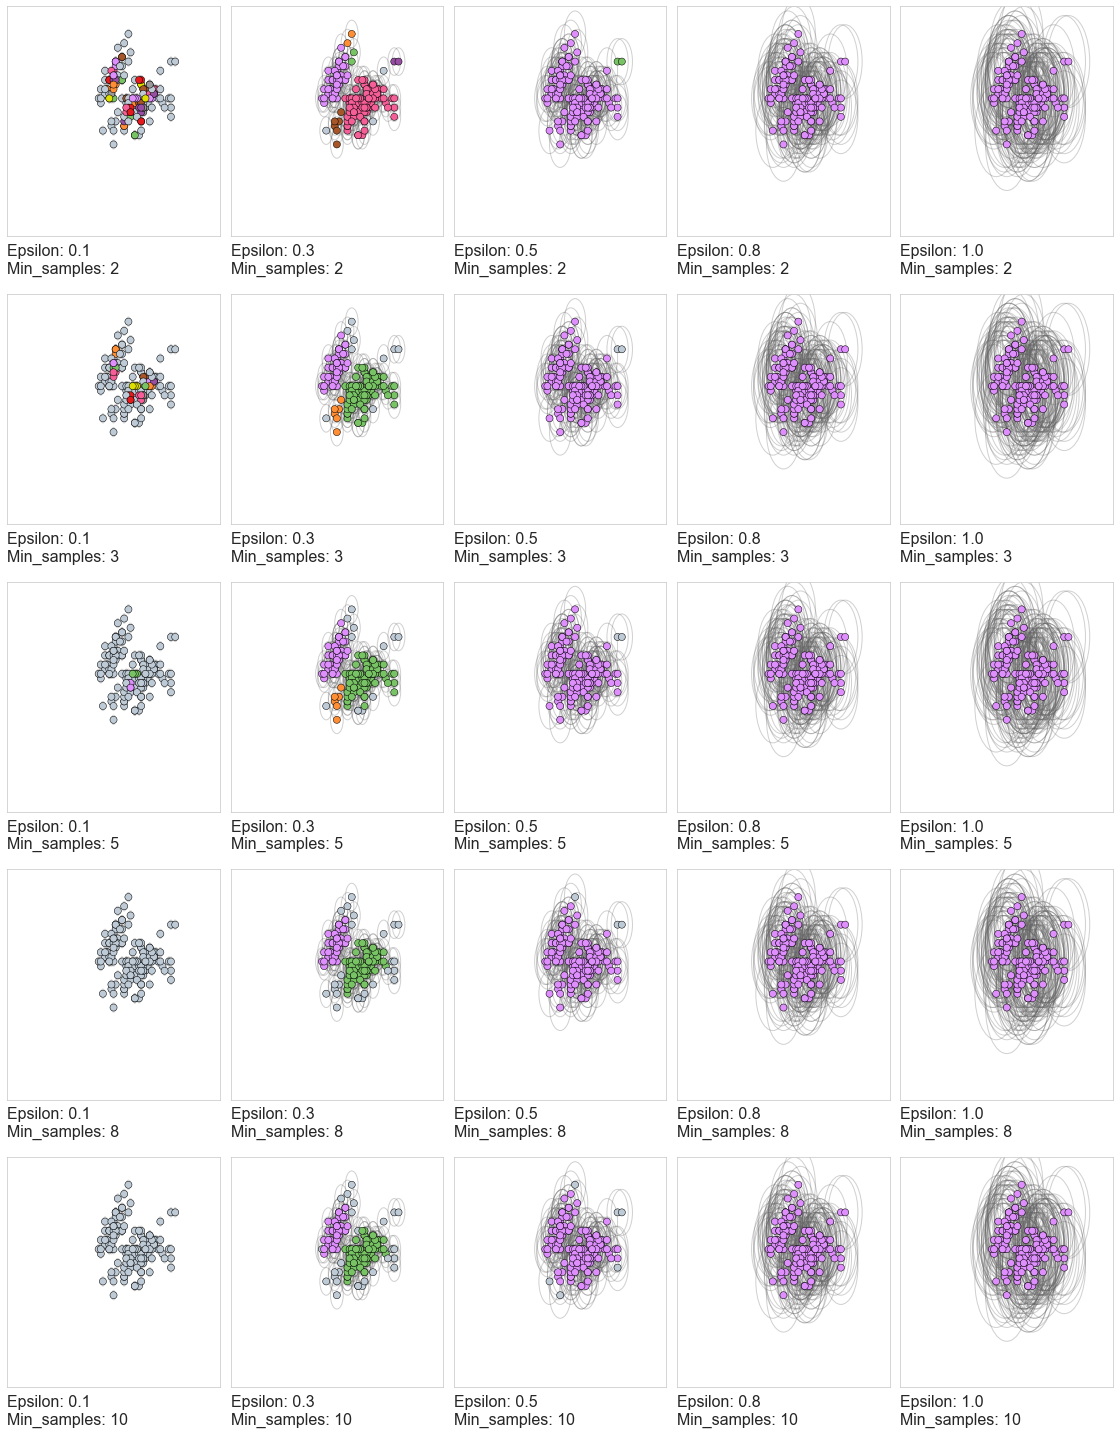

In [37]:
eps_values = [0.1, 0.3, 0.5, 0.8, 1.0]
min_samples_values = [2, 3, 5, 8, 10]
plot_dbscan_grid(X_sepal.values, eps_values, min_samples_values)

Test for petal width vs. petal length

In [38]:
from itertools import cycle, islice
from sklearn import cluster

figsize = (10,10)
point_size=150
point_border=0.8

    
def plot_dbscan_grid_1(dataset, eps_values, min_samples_values):
    
    fig = plt.figure(figsize=(16, 20))
    plt.subplots_adjust(left=.02, right=.98, bottom=0.001, top=.96, wspace=.05,
                        hspace=0.25)


    plot_num = 1

    for i, min_samples in enumerate(min_samples_values):
        for j, eps in enumerate(eps_values):
            ax = fig.add_subplot( len(min_samples_values) , len(eps_values), plot_num)

            dbscan = cluster.DBSCAN(eps=eps, min_samples=min_samples)
            y_pred_2 = dbscan.fit_predict(dataset)

            colors = np.array(list(islice(cycle(['#df8efd', '#78c465', '#ff8e34',
                                                 '#f65e97', '#a65628', '#984ea3',
                                                 '#999999', '#e41a1c', '#dede00']),
                                          int(max(y_pred_2) + 1))))
            colors = np.append(colors, '#BECBD6')


            for point in dataset:
                circle1 = plt.Circle(point, eps, color='#666666', fill=False, zorder=0, alpha=0.3)
                ax.add_artist(circle1)

            ax.text(0, -0.03, 'Epsilon: {} \nMin_samples: {}'.format(eps, min_samples), transform=ax.transAxes, fontsize=16, va='top')
            ax.scatter(dataset[:, 0], dataset[:, 1], s=50, color=colors[y_pred_2], zorder=10, edgecolor='black', lw=0.5)


            plt.xticks(())
            plt.yticks(())
            plt.xlim(-2, 8)
            plt.ylim(-2, 5)

            plot_num = plot_num + 1

    plt.show()

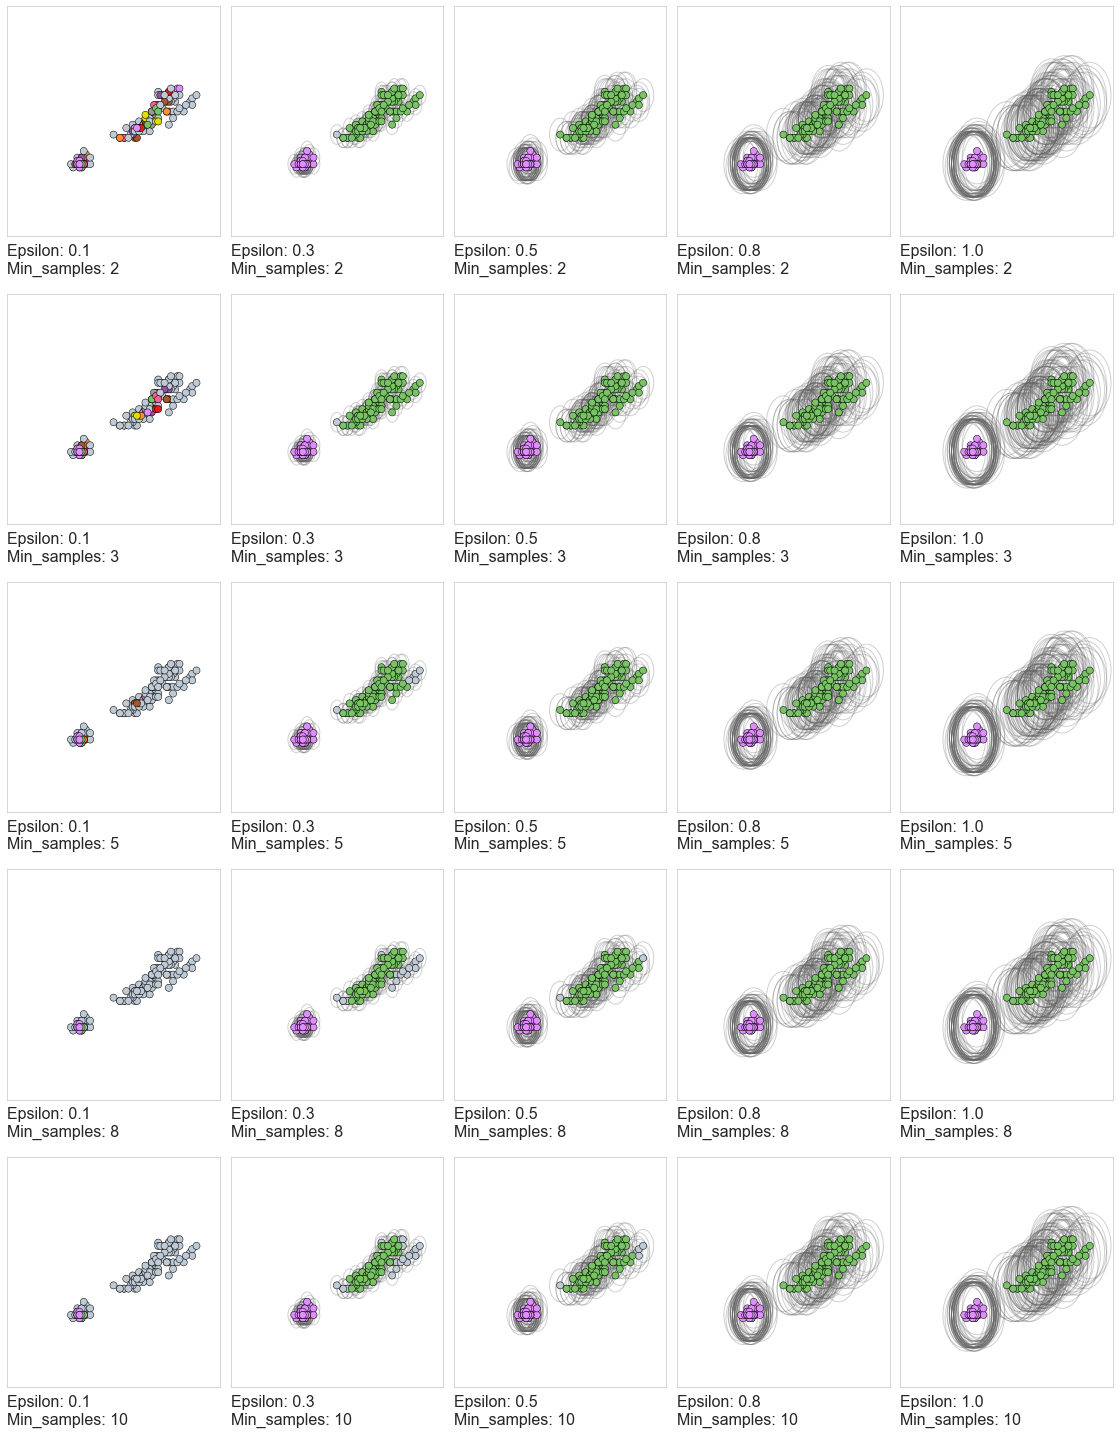

In [39]:
eps_values = [0.1, 0.3, 0.5, 0.8, 1.0]
min_samples_values = [2, 3, 5, 8, 10]
plot_dbscan_grid_1(X_petal.values, eps_values, min_samples_values)

**I also test the PCA data instead of the raw data here to perform the visualization**

In [41]:
from itertools import cycle, islice
from sklearn import cluster

figsize = (10,10)
point_size=150
point_border=0.8

    
def plot_dbscan_grid_pca(dataset, eps_values, min_samples_values):
    
    fig = plt.figure(figsize=(16, 20))
    plt.subplots_adjust(left=.02, right=.98, bottom=0.001, top=.96, wspace=.05,
                        hspace=0.25)


    plot_num = 1

    for i, min_samples in enumerate(min_samples_values):
        for j, eps in enumerate(eps_values):
            ax = fig.add_subplot( len(min_samples_values) , len(eps_values), plot_num)

            dbscan = cluster.DBSCAN(eps=eps, min_samples=min_samples)
            y_pred_2 = dbscan.fit_predict(dataset)

            colors = np.array(list(islice(cycle(['#df8efd', '#78c465', '#ff8e34',
                                                 '#f65e97', '#a65628', '#984ea3',
                                                 '#999999', '#e41a1c', '#dede00']),
                                          int(max(y_pred_2) + 1))))
            colors = np.append(colors, '#BECBD6')


            for point in dataset:
                circle1 = plt.Circle(point, eps, color='#666666', fill=False, zorder=0, alpha=0.3)
                ax.add_artist(circle1)

            ax.text(0, -0.03, 'Epsilon: {} \nMin_samples: {}'.format(eps, min_samples), transform=ax.transAxes, fontsize=16, va='top')
            ax.scatter(dataset[:, 0], dataset[:, 1], s=50, color=colors[y_pred_2], zorder=10, edgecolor='black', lw=0.5)


            plt.xticks(())
            plt.yticks(())
            plt.xlim(-5,5)
            plt.ylim(-5, 5)

            plot_num = plot_num + 1

    plt.show()

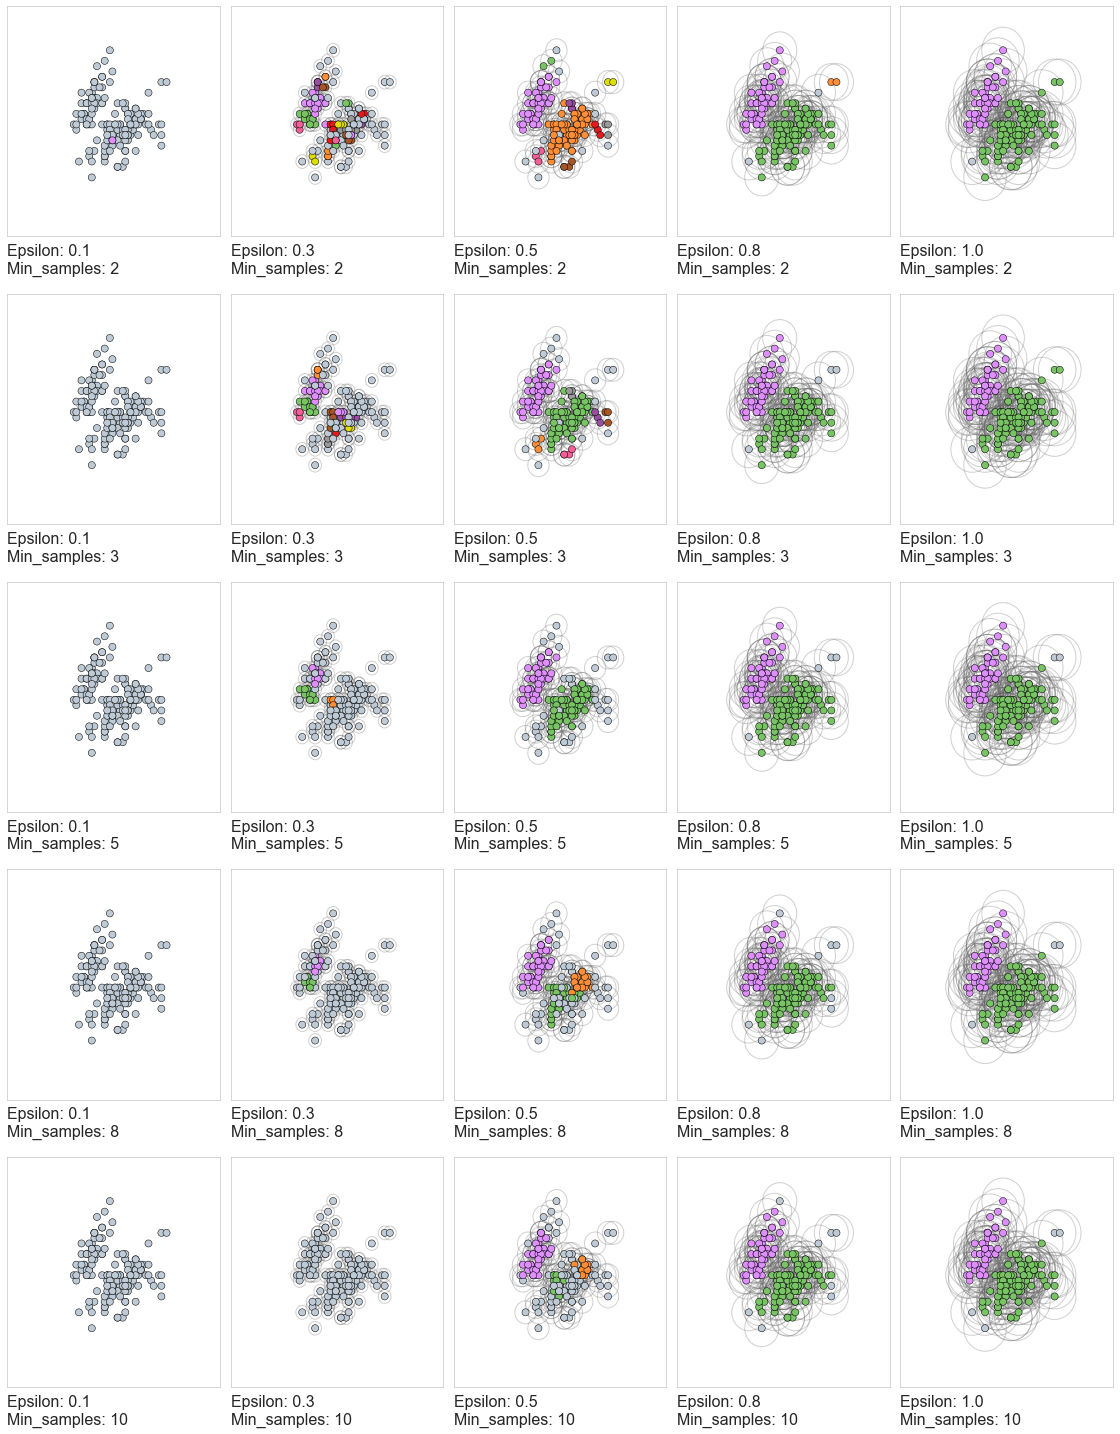

In [42]:
eps_values = [0.1, 0.3, 0.5, 0.8, 1.0]
min_samples_values = [2, 3, 5, 8, 10]
plot_dbscan_grid_pca(X_ss.values, eps_values, min_samples_values)

**Overall, I don't think it is a good idea to apply DBSCAN here as the main advatange of DBSCAN is to identify the noise datapoints. However, in our IRIS data, there are from 3 different species without any noise points.**

### 2. Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix,classification_report
kmn_matrix = confusion_matrix(y,kmn_pred)
kmn_report = classification_report(y,kmn_pred)
kmn_matrix

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])

**I don't think confusion matrix works well here as they are just randomly distribute as 3 clusters, so it may correspond to their original cluster name. Like in the original data, it is called group A, B, C. However, in our clustering data, it may call B,C,A so it influence the result a lot. That's why I prefer ajusted_rand_score below.**

### 3. Adjust Rand Score

Compare the different algorithms based on ajust rand score, also optimize the parameters which gives the highest adjust rand score

In [44]:
from sklearn.metrics import adjusted_rand_score

**K-Means Nearest Clustering**

In [45]:
kmn_score = list()
for i in range(1,21,1):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    kmn_pred = kmeans.fit_predict(X)
    iris_kmeans_score = adjusted_rand_score(df['target'], kmn_pred)
    kmn_score.append(iris_kmeans_score)
print(kmn_score)

[0.0, 0.5399218294207123, 0.7302382722834697, 0.6498176853819967, 0.6078964652364223, 0.4551351634325061, 0.4729016192847723, 0.4439896959337458, 0.37822180764887825, 0.371289494703487, 0.34308952762437334, 0.33491421397684473, 0.3306205476467291, 0.3185520995956927, 0.2808185391887001, 0.24444148899892237, 0.26321526347462726, 0.23198242137363823, 0.2199621724599733, 0.1912748307095478]


Find the n_init value for maximum kmm_score

In [46]:
kmn_randscore = max(kmn_score)
kmn_randscore

0.7302382722834697

In [47]:
kmn_score.index(kmn_randscore) + 1

3

Text(0.5, 1.0, 'KMN adjust rand score')

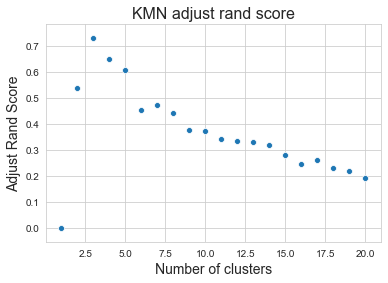

In [48]:
ax1 = sns.scatterplot(x=range(1,21,1),y=kmn_score)
ax1.set_xlabel('Number of clusters',fontsize=14)
ax1.set_ylabel('Adjust Rand Score',fontsize=14)
ax1.set_title('KMN adjust rand score',fontsize=16)

Test for 200 times 

In [49]:
test1 = list()
for i in range(1,201,1):
    kmn = KMeans(n_clusters=3)
    kmn_pred = kmn.fit_predict(X)
    iris_kmeans_score = adjusted_rand_score(y, kmn_pred)
    test1.append(iris_kmeans_score)
test1 = pd.Series(test1)
test1.value_counts()

0.730238    197
0.716342      3
dtype: int64

**From the results we can conclude, for 200 loops, 197 give the same result.Therefore, the maxmimum adjust score for K-means clustering is *0.7302382722834697* with *3* clusters**

**Hierarchical Clustering**

*1. Wald's Method*

In [50]:
ward_score = list()
for i in range(1,21,1):
    ward = AgglomerativeClustering(n_clusters=i)
    ward_pred = ward.fit_predict(X)
    ward_ar_score = adjusted_rand_score(y, ward_pred)
    ward_score.append(ward_ar_score)
print(ward_score)

[0.0, 0.5681159420289855, 0.7311985567707745, 0.660216985695529, 0.59502294387575, 0.43579133281242055, 0.44815339333973314, 0.42518403645309816, 0.4022311804568699, 0.34223126763609907, 0.311891070524089, 0.30119415820396483, 0.26383794822189083, 0.258158856090428, 0.2543736134607008, 0.24873864611855878, 0.2349204725617552, 0.20584536082474225, 0.20515071549191038, 0.19468079413496014]


In [51]:
ward_randscore = max(ward_score)
ward_randscore

0.7311985567707745

In [52]:
ward_score.index(ward_randscore) + 1

3

Text(0.5, 1.0, 'Ward adjust rand score')

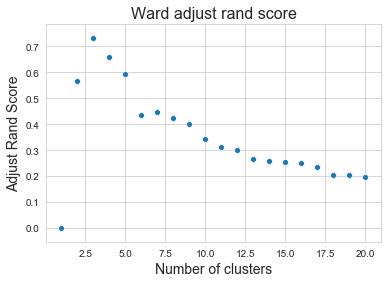

In [53]:
ax2 = sns.scatterplot(x=range(1,21,1),y=ward_score)
ax2.set_xlabel('Number of clusters',fontsize=14)
ax2.set_ylabel('Adjust Rand Score',fontsize=14)
ax2.set_title('Ward adjust rand score',fontsize=16)

Test the results for 200 loops

In [54]:
test2 = list()
for i in range(1,201,1):
    ward = AgglomerativeClustering(n_clusters=3)
    ward_pred = ward.fit_predict(X)
    ward_ar_score = adjusted_rand_score(y, ward_pred)
    test2.append(ward_ar_score)
test2 = pd.Series(test2)
test2.value_counts()

0.731199    200
dtype: int64

**200 times repeat give the same results**

*2. Complete-link*

In [55]:
complete_score = list()
for i in range(1,21,1):
    complete = AgglomerativeClustering(n_clusters=i,linkage='complete')
    complete_pred = complete.fit_predict(X)
    complete_ar_score = adjusted_rand_score(y, complete_pred)
    complete_score.append(complete_ar_score)
print(complete_score)

[0.0, 0.4219886317147244, 0.64225125183629, 0.5894567364350092, 0.43988119756324934, 0.4434895243727947, 0.4189126484194713, 0.45174921666139656, 0.4562035094793062, 0.44627796819039556, 0.4394975292285971, 0.41644845499647937, 0.4083090222556126, 0.40480911035365125, 0.3676345762845694, 0.3339245029857389, 0.32286758759882644, 0.26965613942282424, 0.2541171182215684, 0.22813813396710755]


In [56]:
complete_randscore = max(complete_score)
complete_randscore

0.64225125183629

Find the index for the maximum score

In [57]:
complete_score.index(complete_randscore) + 1

3

Text(0.5, 1.0, 'Ward adjust rand score')

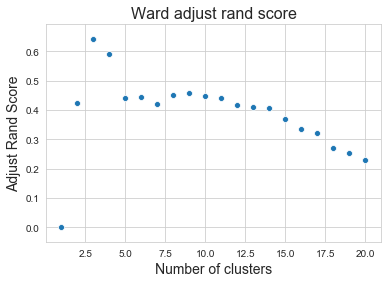

In [58]:
ax3 = sns.scatterplot(x=range(1,21,1),y=complete_score)
ax3.set_xlabel('Number of clusters',fontsize=14)
ax3.set_ylabel('Adjust Rand Score',fontsize=14)
ax3.set_title('Ward adjust rand score',fontsize=16)

Test the results by repeating 200 times

In [59]:
test3 = list()
for i in range(1,201,1):
    com = AgglomerativeClustering(n_clusters=3,linkage='complete')
    com_pred = com.fit_predict(X)
    com_ar_score = adjusted_rand_score(y, com_pred)
    test3.append(com_ar_score)
test3 = pd.Series(test3)
test3.value_counts()

0.642251    200
dtype: int64

**After repeating 200 times, one unique result produced**

*3. Average-link*

In [60]:
average_score = list()
for i in range(1,21,1):
    average = AgglomerativeClustering(n_clusters=i,linkage='average')
    average_pred = average.fit_predict(X)
    average_ar_score = adjusted_rand_score(y, average_pred)
    average_score.append(average_ar_score)
print(average_score)

[0.0, 0.5681159420289855, 0.7591987071071522, 0.7291485842490542, 0.6638479921121677, 0.6524709706541229, 0.57882553171231, 0.571963547513309, 0.5254870308988212, 0.5296439456221073, 0.518080653859885, 0.5403064592394231, 0.5354555896762699, 0.5349157448697449, 0.5353449790427428, 0.5296464425054641, 0.529374605180038, 0.3895400967321802, 0.38422689568605856, 0.3574192951867702]


In [61]:
average_randscore = max(average_score)
average_randscore

0.7591987071071522

In [62]:
average_score.index(average_randscore) + 1

3

Text(0.5, 1.0, 'Ward adjust rand score')

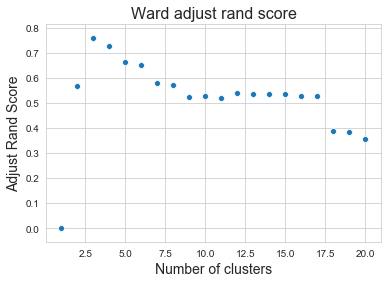

In [63]:
ax4 = sns.scatterplot(x=range(1,21,1),y=average_score)
ax4.set_xlabel('Number of clusters',fontsize=14)
ax4.set_ylabel('Adjust Rand Score',fontsize=14)
ax4.set_title('Ward adjust rand score',fontsize=16)

In [64]:
test4 = list()
for i in range(1,201,1):
    avg = AgglomerativeClustering(n_clusters=3,linkage='average')
    avg_pred = avg.fit_predict(X)
    avg_ar_score = adjusted_rand_score(y, avg_pred)
    test4.append(avg_ar_score)
test4 = pd.Series(test4)
test4.value_counts()

0.759199    200
dtype: int64

**Only one unique result procduced by looping 200 times**

Print the maximum of three linkage adjust rand score

In [65]:
print( "Scores: \nWard:", ward_randscore,"\nComplete: ", complete_randscore, "\nAverage: ", average_randscore)

Scores: 
Ward: 0.7311985567707745 
Complete:  0.64225125183629 
Average:  0.7591987071071522


**Gaussian Mixture Model Clustering**

In [66]:
gmm_score = list()
for i in range(1,21,1):
    gmm = GaussianMixture(n_components=i)
    gmm_pred = gmm.fit_predict(X)
    gmm_ar_score = adjusted_rand_score(y, gmm_pred)
    gmm_score.append(gmm_ar_score)
print(gmm_score)

[0.0, 0.5681159420289855, 0.9038742317748124, 0.8028146695161698, 0.6675762639550594, 0.6152865262786628, 0.61729549514035, 0.4836703693154846, 0.44313808025051576, 0.5011402328475499, 0.3819218307303491, 0.3868312757201646, 0.29190804643862345, 0.30668233201239953, 0.2577867720213489, 0.27091610554926926, 0.22562312890257466, 0.2594088828888492, 0.27468409321380427, 0.21578542319830174]


In [67]:
gmm_randscore = max(gmm_score)
gmm_randscore

0.9038742317748124

In [68]:
gmm_score.index(gmm_randscore) + 1

3

Text(0.5, 1.0, 'Ward adjust rand score')

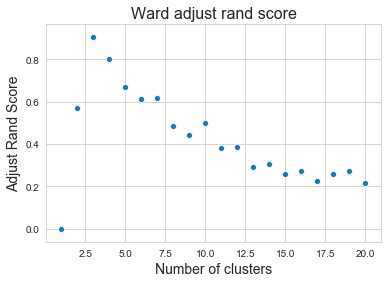

In [69]:
ax5 = sns.scatterplot(x=range(1,21,1),y=gmm_score)
ax5.set_xlabel('Number of clusters',fontsize=14)
ax5.set_ylabel('Adjust Rand Score',fontsize=14)
ax5.set_title('Ward adjust rand score',fontsize=16)

**Test the result**

In [70]:
test5 = list()
for i in range(1,201,1):
    gmm = GaussianMixture(n_components=3)
    gmm_pred = gmm.fit_predict(X)
    gmm_ar_score = adjusted_rand_score(y, gmm_pred)
    test5.append(gmm_ar_score)
test5 = pd.Series(test5)
test5.value_counts()

0.903874    197
0.475190      2
0.460678      1
dtype: int64

**for 200 loops 197 give the same results, which is the highest score**

**Density Based Clustering**

In [71]:
dbscan_score = list()
for i in np.arange(0.1,1.1,0.1):
    for j in range(1,11,2):
        dbscan = DBSCAN(eps=i,min_samples=j)
        dbscan_pred = dbscan.fit_predict(X)
        dbscan_ar_score = adjusted_rand_score(y, dbscan_pred)
        dbscan_score.append(dbscan_ar_score)
print(dbscan_score)

[0.0014604429888695988, 0.0, 0.0, 0.0, 0.0, 0.047627037002960455, 0.07222036400739232, 0.04045586955585659, 0.013678058399610149, 0.0, 0.28998702246735336, 0.2818190729052577, 0.28175608849637584, 0.2545472026591306, 0.21450411060800675, 0.7025763546288538, 0.7063013754344987, 0.5898239119084911, 0.4719110458345387, 0.49121031996964715, 0.521848891331954, 0.5226122364041715, 0.5206185241703302, 0.5099775744110047, 0.5206237239743247, 0.5396094931299716, 0.5400479161115187, 0.5369965960725409, 0.5299637933107492, 0.5299637933107492, 0.5617321312902849, 0.5621364251426576, 0.5621364251426576, 0.5539307406661101, 0.551354968216795, 0.5637510205230709, 0.5637510205230709, 0.5637510205230709, 0.5621364251426576, 0.560078733112642, 0.5681159420289855, 0.5681159420289855, 0.5681159420289855, 0.5681159420289855, 0.5681159420289855, 0.5681159420289855, 0.5681159420289855, 0.5681159420289855, 0.5681159420289855, 0.5681159420289855]


In [72]:
dbscan_randscore = max(dbscan_score)
dbscan_randscore

0.7063013754344987

**Test the result**

In [73]:
test6 = list()
for i in np.arange(1,201,1):
        dbscan = DBSCAN(eps=0.4,min_samples=3)
        dbscan_pred = dbscan.fit_predict(X)
        dbscan_ar_score = adjusted_rand_score(y, dbscan_pred)
        test6.append(dbscan_ar_score)
test6 = pd.Series(test6)
test6.value_counts()  

0.706301    200
dtype: int64

**All loops give the same result**

**Adjusted Rand Score Table**

In [74]:
data = {'Name':['KMN', 'Ward-link', 'Com-link', 'Avg-link','GMM','DBSCAN'], \
        'Adjust-Rand-Score':[kmn_randscore, ward_randscore, complete_randscore,average_randscore,gmm_randscore,dbscan_randscore]} 
df2 = pd.DataFrame(data,index=None)
df2

,Name,Adjust-Rand-Score
0,KMN,0.730238
1,Ward-link,0.731199
2,Com-link,0.642251
3,Avg-link,0.759199
4,GMM,0.903874
5,DBSCAN,0.706301


**From the table above, we can find Gaussian Mixture Model Clustering is the best algorithm from what I choose due to the highest Adjusted Rand Score.K-means is the easiest and most straight forward way of clustering with descent score; Hierachial clustering is not good for applying here, but it is more useful when we want different numbers of clusters, like we can cut the linkage differently to get different numbers of clusters, normally ward linakge gives the best score, but here is average link. GMM is the most stable clustering methods as most random samples will be viewed/treated as Gaussian distribution, provides the most highest score, best clustering method for our dataset. DBSCAN perfoms differently to the different dataset, for some data with useless datapoints, DBSCAN is the best method which can identify the noise points.**

## References

1. https://www.displayr.com/what-is-hierarchical-clustering/
2. https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68
3. https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/
4. https://www.dummies.com/programming/big-data/data-science/how-to-create-an-unsupervised-learning-model-with-dbscan/
5. https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
